# Performing classification on MNIST Dataset using Keras

## Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn import metrics
import seaborn as sns

np.random.seed(0)

## Loading and dividing data into training and testing sets

In [ ]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


**Visualizing Data**

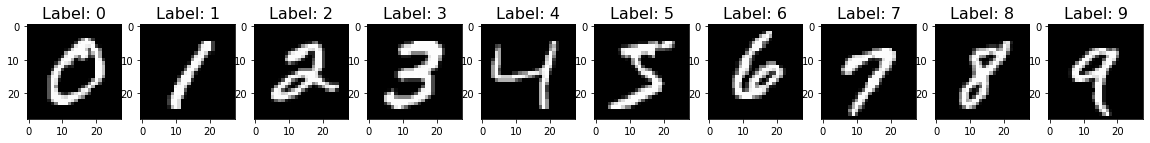

In [ ]:
f, ax = plt.subplots(1, 10, figsize=(20,20))

for i in range(0, 10):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [ ]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
test_target = y_test  # saving target for checking accuracy

**Converting labels into categorical binary values (one hot encoding)**

In [ ]:
y_train = keras.utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)

In [ ]:
print(y_train[0:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


**Normalizing dataset and flattening (28x28) into 784**

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train = X_train.reshape(X_train.shape[0],-1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],-1).astype('float32')

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## Build Model

**Creating a model with** 


1.   i/p layer = 784
2.   hidden layer = (512,256,128)
3.   dropout layer with 25% dead neurons to stop overfitting
4.   o/p layer = 10 with softmax for converting into 0 or 1



In [ ]:
model = Sequential()

model.add(Dense(units=784, input_shape = (784,), activation='relu'))
# model.add(Dense(units=784, activation='relu'))
# model.add(Dense(units=784, activation='relu'))

# model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


**To visualize the model**

In [ ]:
# !pip install ann_visualizer
# !pip install graphviz

# from ann_visualizer.visualize import ann_viz
# ann_viz(model, title="",view=True,filename='MyGraph');

**Compiling and fitting Model** 

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,batch_size=300,epochs=20)

Epoch 1/20
200/200 [==============================] - 2s 3ms/step - loss: 0.5518 - accuracy: 0.8448
Epoch 2/20
200/200 [==============================] - 1s 3ms/step - loss: 0.1387 - accuracy: 0.9595
Epoch 3/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0912 - accuracy: 0.9747
Epoch 4/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0604 - accuracy: 0.9836
Epoch 5/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0445 - accuracy: 0.9875
Epoch 6/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0338 - accuracy: 0.9912
Epoch 7/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0262 - accuracy: 0.9935
Epoch 8/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0220 - accuracy: 0.9945
Epoch 9/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0156 - accuracy: 0.9969
Epoch 10/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0117 - accuracy: 0.9979

## Evaluating Model

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_acc*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.0605 - accuracy: 0.9835
Test Accuracy: 98.35%


In [ ]:
prediction = model.predict(X_test)
prediction

array([[1.28539498e-10, 4.92417652e-12, 1.53476041e-08, ...,
        9.99997377e-01, 2.28639685e-09, 1.91248716e-07],
       [1.05515414e-11, 1.28635588e-06, 9.99998689e-01, ...,
        3.65000037e-20, 6.22381036e-09, 1.30578103e-17],
       [2.44539278e-09, 9.99976635e-01, 3.97578287e-06, ...,
        6.09122844e-06, 1.22933125e-05, 5.42581757e-09],
       ...,
       [6.74345296e-17, 8.62363481e-15, 4.50924276e-17, ...,
        5.66304736e-09, 1.91541072e-09, 3.52008627e-08],
       [2.91336474e-15, 1.25773897e-16, 1.40312000e-16, ...,
        1.80519001e-14, 4.57784154e-07, 2.07147122e-16],
       [1.91579981e-11, 5.39529748e-15, 6.42220695e-12, ...,
        8.59275014e-19, 6.11656925e-14, 8.16839201e-17]], dtype=float32)

In [ ]:
prediction = np.argmax(prediction, axis=1)
print(prediction)
print(prediction.shape)

[7 2 1 ... 4 5 6]
(10000,)


In [ ]:
#calculating various metrics
print("\n-------------------------Accuracy Score----------------------------\n\t\t\t     ",metrics.accuracy_score(test_target, prediction, normalize= True))
print("\n---------------------Classification Report-------------------------\n",metrics.classification_report(test_target, prediction))
print("\n--------------------------Confusion Matrix-------------------------\n",metrics.confusion_matrix(test_target,prediction))


-------------------------Accuracy Score----------------------------
			      0.9835

---------------------Classification Report-------------------------
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


--------------------------Confusion Matrix-------------------------
 [[ 972    1    1

# Fashion MNIST

In [ ]:
from keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


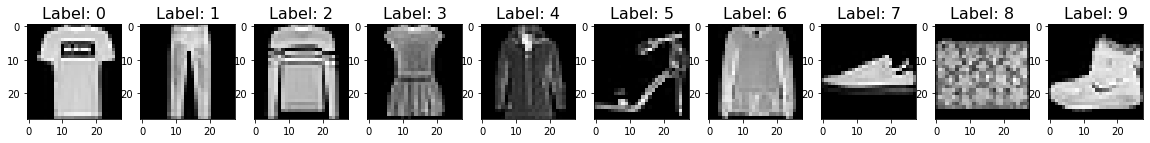

In [ ]:
f, ax = plt.subplots(1, 10, figsize=(20,20))

for i in range(0, 10):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [ ]:
y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
test_target = y_test  # saving target for checking accuracy

In [ ]:
y_train = keras.utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)

In [ ]:
print(y_train[0:10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train = X_train.reshape(X_train.shape[0],-1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],-1).astype('float32')

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
model = Sequential()

model.add(Dense(units=512, input_shape = (784,), activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=256, activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 798,474
Trainable params: 798,474
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,batch_size=128,epochs=20)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.6647 - accuracy: 0.7625
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3707 - accuracy: 0.8659
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3310 - accuracy: 0.8763
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3022 - accuracy: 0.8871
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2844 - accuracy: 0.8942
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2674 - accuracy: 0.8991
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2533 - accuracy: 0.9047
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2447 - accuracy: 0.9094
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2268 - accuracy: 0.9151
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2267 - accuracy: 0.9126

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_acc*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.3363 - accuracy: 0.8947
Test Accuracy: 89.47%


In [ ]:
prediction = model.predict(X_test)
prediction

array([[1.91883748e-11, 2.71866334e-08, 2.22690658e-10, ...,
        6.10578863e-05, 1.30622513e-10, 9.99938369e-01],
       [1.26844493e-10, 1.26234426e-20, 9.99780715e-01, ...,
        7.25687454e-18, 8.64093461e-16, 8.53874474e-21],
       [1.97854923e-18, 1.00000000e+00, 2.33589583e-24, ...,
        9.74198290e-35, 3.48530901e-25, 5.85680392e-24],
       ...,
       [1.52816182e-09, 3.92924058e-15, 1.11882162e-11, ...,
        7.22120009e-13, 9.99999881e-01, 2.03361484e-13],
       [8.53184326e-17, 1.00000000e+00, 1.08348354e-22, ...,
        8.59207904e-30, 1.36439645e-20, 1.21569232e-20],
       [7.65390140e-10, 3.48489480e-14, 3.52285170e-08, ...,
        3.68165729e-08, 2.53438230e-08, 2.24580729e-10]], dtype=float32)

In [ ]:
prediction = np.argmax(prediction, axis=1)
print(prediction)
print(prediction.shape)

[9 2 1 ... 8 1 5]
(10000,)


In [ ]:
#calculating various metrics
print("\n-------------------------Accuracy Score----------------------------\n\t\t\t     ",metrics.accuracy_score(test_target, prediction, normalize= True))
print("\n---------------------Classification Report-------------------------\n",metrics.classification_report(test_target, prediction))
print("\n--------------------------Confusion Matrix-------------------------\n",metrics.confusion_matrix(test_target,prediction))


-------------------------Accuracy Score----------------------------
			      0.8947

---------------------Classification Report-------------------------
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1000
           1       0.99      0.98      0.99      1000
           2       0.80      0.81      0.80      1000
           3       0.91      0.90      0.90      1000
           4       0.81      0.83      0.82      1000
           5       0.98      0.96      0.97      1000
           6       0.73      0.73      0.73      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000


--------------------------Confusion Matrix-------------------------
 [[828   1  24  1